In [2]:
# %load std_libraries.py
#to keep my scripts consistent, I am adding this to the top of all scripts with %load std_libraries.py
import sys
#Indicate operating environment and import core modules
location_input = input("what computer are you on? a = Bens, b = gpucluster, c = other   ")
location_dict = {'a': "C:\\Users\\heine\\github\\expression_broad_data", 'b': "/home/heineike/github/expression_broad_data",'c':'you need to add your location to the location_dict'}
base_dir = location_dict[location_input]
print("base directory is " + base_dir)

if sys.path[-1] != base_dir:
    sys.path.append(base_dir)
    print("Added " + base_dir + " to path: " )
    print(sys.path)

import os

print("I am about to import a library")
from core import expression_plots 
from core import io_library 
%load_ext autoreload
%autoreload 2
# %matplotlib 
# plt.ioff()
#%matplotlib inline
%matplotlib notebook
data_processing_dir = base_dir + os.sep + os.path.normpath("expression_data") + os.sep

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#from matplotlib_venn import venn2
#import seaborn as sns; sns.set(style="ticks", color_codes=True)
#from sklearn import linear_model
#import pickle
#import subprocess
#import networkx as nx
#import scipy.stats as stats
#import statsmodels.graphics.gofplots as stats_graph
#import scipy.cluster.hierarchy as sch

# from Bio import SeqIO
# from Bio import SeqFeature as sf
# from Bio.Alphabet import generic_dna
# from Bio.Seq import Seq

# import re

from collections import Counter
# import scipy.stats as stats
# from itertools import chain
#this only works if you are online
online_input = input("are you online? Yes/No")
if online_input == "Yes": 
    import plotly.plotly as py
    import plotly.graph_objs as pygo
    import plotly.tools as pytools
    py.sign_in('heineike02_student','9dMTMZgJMgUP0YX0P5mQ')
    #py.sign_in('heineike02', 'APPjKrtARaN2ZgUYIkqr')
    
# for phylogenetic trees: 
# from ete3 import Tree

#for scraping internet data (e.g. ncbi)
#import requests
#from lxml import etree    #parses xml output

what computer are you on? a = Bens, b = gpucluster, c = other   b
base directory is /home/heineike/github/expression_broad_data
I am about to import a library
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
are you online? Yes/NoYes


In [3]:
#Import Promoters

#Read in the KL promoter database.  
kl_promoters = pd.read_pickle(data_processing_dir + os.path.normpath("kl_promoters/kl_promoters.pkl"))

#Read in the SC promoter database.  
sc_promoters = pd.read_pickle(data_processing_dir + os.path.normpath("sc_promoters/sc_promoters.pkl"))


# Import SC data
spec = 'SC'
lfc_SC = pd.read_csv(data_processing_dir + os.path.normpath("20170817_klscpka/20170817_klscpka_DESEQ_YPD_t40_AsMinvAsPlus_" + spec + ".csv"))
# Import KL data
spec = 'KL'
lfc_KL = pd.read_csv(data_processing_dir + os.path.normpath("20170817_klscpka/20170817_klscpka_DESEQ_YPD_t40_AsMinvAsPlus_" + spec + ".csv"))

# Import KL/SC data
fname_cross_spec_comparison = data_processing_dir + os.path.normpath("20170817_klscpka/cross_species_compare_ASminus_ASplus_YPD.csv")
kl_sc_PKA_data = pd.read_csv(fname_cross_spec_comparison, index_col=0)

<IPython.core.display.Javascript object>


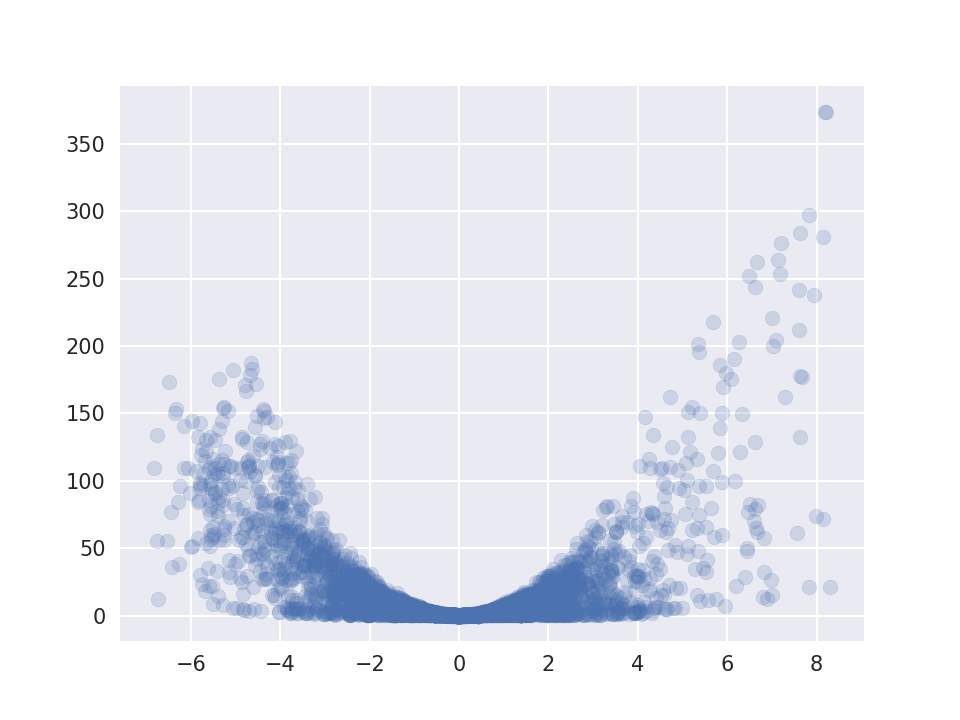

In [5]:
plt.scatter(lfc_SC['log2FoldChange'],-np.log(lfc_SC['padj']),alpha = 0.2)

#Add log fold change
#Add lines


Choose cutoff such that fold change and padj are above the line that passes through 

SC:
 1. (x,y) = (2.9, 72) and (4.6,0.21)
 2. (x,y) = (2.57, 56.6) and (4.11, 0.96)

KL: 
 1. (x,y) = (3.68,56.6) and (4.7, 3.97)
 2. (x,y) = (2.55, 30.2) and (3.85, 1.0)

thus we want the line y >= y1 + (y1 - y2)/(x1-x2) * (x - x1)

1. was chosen with no alpha. This gives 184 induced genes for SC and 71 for KL 
2. was chosen wiht alpha 0.2 so better able to see the distribution.  This gives 237 for SC and 203 for KL.


In [8]:
pd.__version__


'0.20.3'

In [4]:
#P1 Values
(x1,y1) = (2.9, 72) 
(x2,y2) = (4.6,0.21)

# #P2 Values
# (x1,y1) = (2.57,56.6)
# (x2,y2) = (4.11,0.96)

lfc_SC['nlog_padj'] = -np.log(lfc_SC['padj'])
lfc_SC['padj_test'] = y1 + (y2-y1)*(lfc_SC['log2FoldChange']-x1)/(x2-x1)
lfc_SC_act = lfc_SC[lfc_SC['nlog_padj'] > lfc_SC['padj_test']].copy()
#rename seems to work differently in my newer version of pandas than in 
#the version on the server = 0.20.3
if pd.__version__ == '0.20.3':
    lfc_SC_act.rename(columns = {'Unnamed: 0':'sc_genename'}, inplace=True)
else: 
    lfc_SC_act.rename({'Unnamed: 0':'sc_genename'}, axis='columns', inplace=True)

In [37]:
target_promoter_fname = data_processing_dir + os.path.normpath('sc_promoters/promoter_sets/sc_act_20180304_LFC_padj_line_p1.fasta')
io_library.write_promoter_file(sc_promoters, list(lfc_SC_act['sc_genename']),target_promoter_fname)

<IPython.core.display.Javascript object>


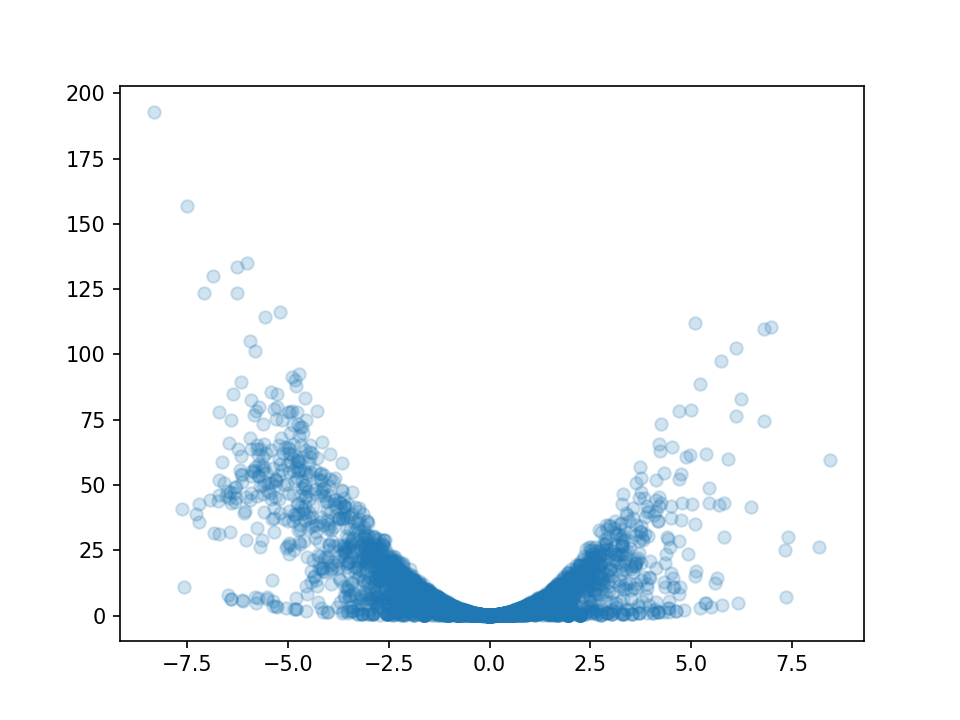

In [6]:
plt.scatter(lfc_KL['log2FoldChange'],-np.log(lfc_KL['padj']), alpha=0.2)

In [5]:
#P1 values
(x1,y1) = (3.68,56.6)
(x2,y2) = (4.7, 3.97)

# #P2 values
# (x1,y1) = (2.55, 30.2)
# (x2,y2) = (3.85, 1.0)

lfc_KL['nlog_padj'] = -np.log(lfc_KL['padj'])
lfc_KL['padj_test'] = y1 + (y2-y1)*(lfc_KL['log2FoldChange']-x1)/(x2-x1)
lfc_KL_act = lfc_KL[lfc_KL['nlog_padj'] > lfc_KL['padj_test']].copy()
#rename seems to work differently in my newer version of pandas than in 
#the version on the server = 0.20.3
if pd.__version__ == '0.20.3':
    lfc_KL_act.rename(columns = {'Unnamed: 0':'kl_genename'}, inplace=True)
else: 
    lfc_KL_act.rename({'Unnamed: 0':'kl_genename'}, axis='columns', inplace=True)
kl_genenames_fixed = io_library.kl_genename_convert_list(list(lfc_KL_act['kl_genename']))
lfc_KL_act['kl_genename'] = kl_genenames_fixed

In [19]:
target_promoter_fname = data_processing_dir + os.path.normpath('kl_promoters/promoter_sets/kl_act_20180304_LFC_padj_line_p2.fasta')
io_library.write_promoter_file(kl_promoters, list(lfc_KL_act['kl_genename']),target_promoter_fname)

KLLA0C17908r not in promoter data set.
EBG00000982146 not in promoter data set.
KLLA0C17886r not in promoter data set.
EBG00000981572 not in promoter data set.
EBG00000982177 not in promoter data set.
EBG00000982260 not in promoter data set.
EBG00000981580 not in promoter data set.
EBG00000981812 not in promoter data set.
EBG00000981852 not in promoter data set.
EBG00000981753 not in promoter data set.
EBG00000982055 not in promoter data set.
EBG00000982195 not in promoter data set.
EBG00000981588 not in promoter data set.
EBG00000982310 not in promoter data set.
EBG00000982234 not in promoter data set.
EBG00000982277 not in promoter data set.
EBG00000981754 not in promoter data set.
EBG00000981865 not in promoter data set.


In [41]:
set(lfc_KL_act['kl_genename']) - set(kl_promoters.index)

{'EBG00000981580',
 'EBG00000981812',
 'EBG00000982055',
 'EBG00000982177',
 'EBG00000982260'}

In [10]:

control_gene_lists = {'SC': list(sc_promoters.index), 'KL': list(kl_promoters.index)}

sc_act = list(lfc_SC_act['sc_genename'])
kl_act = list(lfc_KL_act['kl_genename'])
kl_act_sc_orth = list(kl_sc_PKA_data[kl_sc_PKA_data['kl_genename'].isin(kl_act)]['sc_genename'])
sc_only_act = list(set(sc_act)-set(kl_act_sc_orth))
sc_act_kl_orth = list(kl_sc_PKA_data[kl_sc_PKA_data['sc_genename'].isin(sc_act)]['kl_genename'])
kl_only_act = list(set(kl_act)-set(sc_act_kl_orth))
sc_sckl_act = list(set(sc_act) & set(kl_act_sc_orth))
kl_sckl_act = list(set(kl_act) & set(sc_act_kl_orth))
sc_klonly_act = list(kl_sc_PKA_data[kl_sc_PKA_data['kl_genename'].isin(kl_only_act)]['sc_genename'])
kl_sconly_act = list(kl_sc_PKA_data[kl_sc_PKA_data['sc_genename'].isin(sc_only_act)]['kl_genename'])
gene_list_dict = {'sc_act': sc_act, 
                  'kl_act': kl_act, 
                  'sc_only_act': sc_only_act,
                  'kl_only_act': kl_only_act, 
                  'sc_sckl_act': sc_sckl_act, 
                  'kl_sckl_act': kl_sckl_act,
                  'sc_klonly_act': sc_klonly_act,
                  'kl_sconly_act': kl_sconly_act
                 }

[(key, len(value)) for key, value in gene_list_dict.items()]

[('kl_only_act', 47),
 ('kl_act', 71),
 ('kl_sconly_act', 112),
 ('sc_klonly_act', 27),
 ('sc_only_act', 156),
 ('sc_act', 184),
 ('sc_sckl_act', 28),
 ('kl_sckl_act', 24)]

In [15]:
#There are 20 genes with no SC orthologs that are active under PKA inhibition in K.Lac. 
set(kl_only_act) - set(list(kl_sc_PKA_data[kl_sc_PKA_data['sc_genename'].isin(sc_klonly_act)]['kl_genename']))
#KLLA0_D15521g looks similar to SPO19(YNL202W) per ncbi. The ortholog of YNL202W is #KLLA0_D15521g looks similar to SPO19(YNL202W) per ncbi. The ortholog of YNL202W is #KLLA0_D15521g looks similar to SPO19(YNL202W) per ncbi.
#        The ortholog of YNL202W is KLLA0D18909g
#KLLA0D19929g weakly similar to uniprot|P35497 Saccharomyces cerevisiae YJR159W SOR1 Sorbitol dehydrogenase
#KLLA0E09857g weakly similar to uniprot|Q05016 Saccharomyces cerevisiae YMR226C NADP()-dependent dehydrogenase acts on serine L-allo-threonine and other 3-hydroxy acids
#KLLA0E10935g similar to uniprot|P78609 Pichia jadinii Uricase
#KLLA0E15005g similar to uniprot|P27614 Saccharomyces cerevisiae YJL172W CPS1 Vacuolar carboxypeptidase yscS expression is induced under low-nitrogen conditions
#KLLA0F12628g similar to uniprot|P38067 Saccharomyces cerevisiae YBR006w UGA2 succinate semialdehyde dehydrogenase involved in the utilization of gamma-aminobutyrate (GABA) as a nitrogen source
#KLLA0F25520g The KLLA0_F25520g gene is conserved in E.gossypii, S.pombe, M.oryzae, and N.crassa.

{'EBG00000981580',
 'EBG00000981812',
 'EBG00000982055',
 'EBG00000982177',
 'EBG00000982260',
 'KLLA0B14773g',
 'KLLA0C11121g',
 'KLLA0C13079g',
 'KLLA0D15521g',
 'KLLA0D19929g',
 'KLLA0D19949g',
 'KLLA0E09857g',
 'KLLA0E10935g',
 'KLLA0E15005g',
 'KLLA0E15181g',
 'KLLA0E15203g',
 'KLLA0E19713g',
 'KLLA0F00682g',
 'KLLA0F09977g',
 'KLLA0F12628g',
 'KLLA0F22341g',
 'KLLA0F25520g'}

In [68]:
#The difference between the KL and SC counts for sckl_act is because there are some SC activated paralog pairs
#in which both pairs are activated. 
overlap_counts = Counter(list(kl_sc_PKA_data[kl_sc_PKA_data['sc_genename'].isin(sc_sckl_act)]['kl_genename']))
double_genes = [kl_gene for kl_gene, N in overlap_counts.items() if N>1]
double_genes_sc = list(kl_sc_PKA_data[kl_sc_PKA_data['kl_genename'].isin(double_genes)]['sc_genename'])
set(double_genes_sc) - set(sc_act)

set()

In [16]:
# Run AME enrichment analysis using meme

# AME on same sets, using 
# MacIsaac + SCPD.  motif = {'name': 'MacIsaac_SCPD_avg_ranksum', 'fname': 'macisaac_yeast_v1_scpd.meme' }
#    For this one I manually added SCPD to the bottom of the macisaac dataset - the macisaac
#    dataset had actual base probabilities unlike SCPD, siwss regulon and Jaspar. 
# Swiss Regulon: {'name': 'swiss_regulon_avg_ranksum', 'fname': 'SwissRegulon_s_cer.meme' }
# Jaspar Core Fungi: motif = {'name': 'Jaspar_core_2018_avg_ranksum', 'fname': 'JASPAR2018_CORE_fungi_redundant.meme' }
motifs = {'swiss_regulon_avg_ranksum': 'SwissRegulon_s_cer.meme', 
          'Jaspar_core_2018_avg_ranksum': 'JASPAR2018_CORE_fungi_redundant.meme', 
          'MacIsaac_SCPD_avg_ranksum': 'macisaac_yeast_v1_scpd.meme'}

for motif_name, motif_fname in motifs.items():
    print(motif_name)
    for gene_list_name in ['sc_klonly_act', 'kl_sconly_act']:    
        print(gene_list_name) 
        target_gene_list = gene_list_dict[gene_list_name] 
        spec = gene_list_name.split('_')[0].upper()
        control_gene_list = control_gene_lists[spec]
        target_fname_prefix = '20180406_' + gene_list_name + '_P1'
        control_fname_prefix = spec.lower() + '_all'
        motif = {'name': motif_name, 'fname': motif_fname }

        io_library.run_ame_analysis(spec, target_gene_list, control_gene_list,target_fname_prefix, control_fname_prefix, motif, 
                             promoter_dir = {'KL': data_processing_dir+'kl_promoters/' , 'SC': data_processing_dir + 'sc_promoters/'},
                             promoter_fname = {'KL': 'kl_promoters.pkl', 'SC': 'sc_promoters.pkl'},
                             ame_scoring = 'avg',
                             ame_method = 'ranksum',
                             ame_pvalue_threshold = '0.04' )



Jaspar_core_2018_avg_ranksum
sc_klonly_act
ame output return code = 0
kl_sconly_act
ame output return code = 0
swiss_regulon_avg_ranksum
sc_klonly_act
ame output return code = 0
kl_sconly_act
ame output return code = 0
MacIsaac_SCPD_avg_ranksum
sc_klonly_act
ame output return code = 0
kl_sconly_act
ame output return code = 0


In [18]:
#For each motif list

motifs = {'Jaspar': 'Jaspar_core_2018_avg_ranksum', 
          'MacIsaac_SCPD': 'MacIsaac_SCPD_avg_ranksum',
          'Swiss_regulon': 'swiss_regulon_avg_ranksum'}

for motif_set_abbrev, motif_set in motifs.items(): 
    data = []
    for group in ['act','only_act','sckl_act']: 

        #break down each set into a different trace

        fname_y = os.path.normpath(data_processing_dir + 'sc_promoters/ame_output/20180406_sc_' + group + '_P1_vs_sc_all_motif_' + motif_set + '_pVal_0.04ame.txt')
        fname_x = os.path.normpath(data_processing_dir + 'kl_promoters/ame_output/20180406_kl_' + group + '_P1_vs_kl_all_motif_' + motif_set + '_pVal_0.04ame.txt')
        ame_data_x = io_library.read_ame_output(fname_x)
        ame_data_y = io_library.read_ame_output(fname_y)

        ame_data_to_plot = ame_data_x.merge(ame_data_y, how = 'outer', on = 'motif_name', suffixes = ('_x', '_y'))
        overlap_consensus_column = io_library.merge_overlap_column(ame_data_to_plot['motif_consensus_x'], ame_data_to_plot['motif_consensus_y'])
        ame_data_to_plot['motif_consensus'] = overlap_consensus_column

        y_data = -np.log(ame_data_to_plot['pval_y'])/np.log(10)
        y_data.fillna('0', inplace=True)
        x_data = -np.log(ame_data_to_plot['pval_x'])/np.log(10)
        x_data.fillna('0', inplace=True)

        hover_text = []
        for ind, row in ame_data_to_plot.iterrows():
            hover_text.append('{motif_name}<br>{motif_consensus})'.format(
                                      motif_name=row['motif_name'],
                                      motif_consensus = row['motif_consensus']
                                      )
                             )




        trace = pygo.Scatter(
                x = x_data, 
                y =  y_data,
                text = hover_text,
                mode = 'markers',
                marker = {'size': 14,
                          'opacity': 0.5}, 
                          #'color': kl_sc_PKA_data_subset_subset['rlog_AS_noNMPP1_YPD_t40_mean_KL']},
                name = group
            )

        data.append(trace)

    layout = pygo.Layout(
        font = {"size": 20}, 
        title = motif_set_abbrev,
        xaxis= {
            #"range":[-2, 20],
            "title":'KL active v.s. all KL -log_10 corr pval enrichment'
        },
        yaxis= {
            #"range":[-2, 20],
            "title": 'SC active v.s. all SC -log_10 corr pval enrichment'
        }
    )


    fig = pygo.Figure(data=data, layout = layout)
    py.iplot(fig, filename='sc v.s. kl active ame ' +  motif_set_abbrev)

FileNotFoundError: [Errno 2] No such file or directory: '/home/heineike/github/expression_broad_data/expression_data/sc_promoters/ame_output/20180406_sc_sconly_act_P1_vs_sc_all_motif_MacIsaac_SCPD_avg_ranksum_pVal_0.04ame.txt'

In [21]:
motifs = {'Jaspar': 'Jaspar_core_2018_avg_ranksum', 
          'MacIsaac_SCPD': 'MacIsaac_SCPD_avg_ranksum',
          'Swiss_regulon': 'swiss_regulon_avg_ranksum'}

for motif_set_abbrev, motif_set in motifs.items(): 
    data = []
    fname_x = os.path.normpath(data_processing_dir + 'kl_promoters/ame_output/20180406_kl_sconly_act_P1_vs_kl_all_motif_' + motif_set + '_pVal_0.04ame.txt')
    fname_y = os.path.normpath(data_processing_dir + 'sc_promoters/ame_output/20180406_sc_only_act_P1_vs_sc_all_motif_' + motif_set + '_pVal_0.04ame.txt')
    ame_data_x = io_library.read_ame_output(fname_x)
    ame_data_y = io_library.read_ame_output(fname_y)

    ame_data_to_plot = ame_data_x.merge(ame_data_y, how = 'outer', on = 'motif_name', suffixes = ('_x', '_y'))
    overlap_consensus_column = io_library.merge_overlap_column(ame_data_to_plot['motif_consensus_x'], ame_data_to_plot['motif_consensus_y'])
    ame_data_to_plot['motif_consensus'] = overlap_consensus_column

    y_data = -np.log(ame_data_to_plot['pval_y'])/np.log(10)
    y_data.fillna('0', inplace=True)
    x_data = -np.log(ame_data_to_plot['pval_x'])/np.log(10)
    x_data.fillna('0', inplace=True)

    hover_text = []
    for ind, row in ame_data_to_plot.iterrows():
        hover_text.append('{motif_name}<br>{motif_consensus})'.format(
                                  motif_name=row['motif_name'],
                                  motif_consensus = row['motif_consensus']
                                  )
                         )




    trace = pygo.Scatter(
            x = x_data, 
            y =  y_data,
            text = hover_text,
            mode = 'markers',
            marker = {'size': 14,
                      'opacity': 0.5}, 
                      #'color': kl_sc_PKA_data_subset_subset['rlog_AS_noNMPP1_YPD_t40_mean_KL']},
            name = group
        )

    data.append(trace)

    layout = pygo.Layout(
        font = {"size": 20}, 
        title = motif_set_abbrev,
        xaxis= {
            #"range":[-2, 20],
            "title":'KL orth of SC active v.s. all KL -log_10 corr pval enrichment'
        },
        yaxis= {
            #"range":[-2, 20],
            "title": 'SC active v.s. all SC -log_10 corr pval enrichment'
        }
    )


    fig = pygo.Figure(data=data, layout = layout)
    py.iplot(fig, filename='sc sc_only v.s. kl sc_only active ame ' +  motif_set_abbrev)

In [ ]:
#Find STRE, PDS, TATA , (Gal, Crz1) in all promoters and plot on top of my data. 

In [ ]:
#Look at raw expression levels for my genes of interest
condition = 'log'

#Plot kl v.s. sc with overlay from gis1 rph1 experiment
kl_sc_PKA_data_subset = kl_sc_PKA_data_goi

hover_text = []
for ind, row in kl_sc_PKA_data_subset.iterrows():
    hover_text.append(('{SC_common_name}<br>kl cont: {klmin:.2f}<br>kl nmpp1: {klnmpp1:.2f}<br> gis1: {gminwt:.2f}<br>rph1:{rminwt:.2f}<br>gis1_rph1: {grminwt:.2f}' + 
                      '<br>asmin: {solis_as_min:.2f}<br>asplus: {solis_as_plus:.2f}<br>msn2/4_minus: {solis_m24_min:.2f}<br>msn2/4_plus: {solis_m24_plus:.2f}').format(
                              SC_common_name=row['SC_common_name'],
                              klmin = row['rlog_AS_noNMPP1_YPD_t40_mean_KL'],
                              klnmpp1 = row['rlog_AS_yesNMPP1_YPD_t40_mean_KL'],
                              gminwt = row[condition + '_g-wt'], 
                              rminwt = row[condition + '_r-wt'],
                              grminwt = row[condition + '_gr-wt'], 
                              solis_as_plus = row['solis_rlog_AS_1NMPP1'],
                              solis_as_min = row['solis_rlog_AS_cont'],
                              solis_m24_plus = row['solis_rlog_msn24del_1NMPP1'],
                              solis_m24_min = row['solis_rlog_msn24del_cont'] ))

kl_sc_PKA_data_subset['hover'] = hover_text

data = []

for category in gois.keys():
    kl_sc_PKA_data_subset_subset = kl_sc_PKA_data_subset[kl_sc_PKA_data_subset['category']==category]

    trace = pygo.Scatter(
        x = kl_sc_PKA_data_subset_subset['rlog_AS_noNMPP1_YPD_t40_mean_SC'], 
        y =  kl_sc_PKA_data_subset_subset['rlog_AS_yesNMPP1_YPD_t40_mean_SC'],
        text = kl_sc_PKA_data_subset_subset['hover'],
        mode = 'markers',
        marker = {'opacity': 0.5}, 
                  #'color': kl_sc_PKA_data_subset_subset['rlog_AS_noNMPP1_YPD_t40_mean_KL']},
        name = category
    )

    data.append(trace)

layout = pygo.Layout(
    xaxis= {
        #"range":[-2, 20],
        "title":'SC rlog control'
    },
    yaxis= {
        #"range":[-2, 20],
        "title":'SC rlog + NMPP1'
    }
)


fig = pygo.Figure(data=data, layout = layout)
py.iplot(fig, filename='rph1_gis1_msn24_gois_raw_expression'+ condition)

In [ ]:
#Show the overlap of differentially expressed genes between various conditions -
#does it correlate with nearness to PKA inhibition. 
#Conditions to compare: 'PKA_inh_YPD_t40
conditions_to_compare = ['PKA_inh_SDC_t40','PS/LOG_reg', 'heat shock_045_reg', 'NaCl_030_reg', '1.5 mM diamide (20 min)', 
                         'Nitrogen Depletion 2 h' , 'aa starv 1 h', 'dtt 030 min', 
                         'steady state 21 dec C', 'sulfur_Aerobic_vs_Anaerobic', 'YP fructose vs YPD']

#Show normal dist superimposed and QQ plot for various options

#Assumption LFC is normally distributed. 

cutoff = 1.5   #make my cutoff for differential expression 1.5 std deviations. 

#Load orthologs
# ohnologs_expression_sorted = pd.read_csv(data_processing_dir + os.path.normpath('20170817_klscpka/20170817_ohnologs_sorted.csv'))
ohnologs = pd.read_csv(data_processing_dir + os.path.normpath("ortholog_files_YGOB/ohnologs.csv"))

#For my data
base_condition = 'PKA_inh_YPD_t40'
base_data = compiled_exp_data_nanrm[base_condition]
base_mean = base_data.mean()
base_std = base_data.std()
base_data_shift = (base_data-base_mean)/base_std
# plt.hist(base_data_shift,bins=100)

fig, axarr = plt.subplots(3,4)

#For a given gene expression dataset, 

for ind, comp_condition in enumerate(conditions_to_compare): 
    ax = axarr.flatten()[ind]
    comp_data = compiled_exp_data_nanrm[comp_condition]
    comp_mean = comp_data.mean()
    comp_std = comp_data.std()
    comp_data_shift = (comp_data-comp_mean)/comp_std

    #output differentially expressed paralogs. 
    data_comparison_full = pd.DataFrame(compiled_exp_data_nanrm['sc_genename'])
    data_comparison_full['base'] = base_data_shift
    data_comparison_full['comp'] = comp_data_shift
    data_comparisons = {}

    for ortholog_set in ['Gene 1', 'Gene 2']: 
        data_comparison = data_comparison_full[compiled_exp_data_nanrm['sc_genename'].isin(ohnologs[ortholog_set])].copy()  
        for cond in ['base','comp']: 
             data_comparison[cond+ '_levels'] =  io_library.threshold_group_KL_series(data_comparison[cond],cutoff,-cutoff)
        data_comparisons[ortholog_set] = data_comparison
        columns = data_comparison.columns
        column_rename = {column: column + '_' + ortholog_set for column in columns[1:]}
        data_comparison.rename(column_rename, axis=1, inplace=True)

    ohnologs_g1 = ohnologs.merge(data_comparisons['Gene 1'], left_on='Gene 1', right_on = 'sc_genename', how='inner')
    ohnologs_g1.drop('sc_genename', axis = 1, inplace = True)
    ohnologs_g12 = ohnologs_g1.merge(data_comparisons['Gene 2'], left_on='Gene 2', right_on = 'sc_genename', how='inner')
    ohnologs_g12.drop('sc_genename', axis = 1, inplace=True)

    for cond in ['base','comp']: 
        diff_exp = []
        for ind, row in ohnologs_g12.loc[:,[cond + '_levels_Gene 1',cond + '_levels_Gene 2']].iterrows():
            diff_exp.append(row[cond + '_levels_Gene 1'] != row[cond + '_levels_Gene 2'])
        ohnologs_g12['diff_exp_' + cond] = diff_exp

    base_diff_genes = set(ohnologs_g12[ohnologs_g12['diff_exp_base']]['Gene 1'])
    comp_diff_genes = set(ohnologs_g12[ohnologs_g12['diff_exp_comp']]['Gene 1'])
    venn2([base_diff_genes, comp_diff_genes], set_labels = (base_condition, comp_condition), ax=ax)

axarr[2,3].axis("off")
fig.set_figheight(15)
fig.set_figwidth(20)
fig.savefig(os.path.normpath('C:\\Users\heine\Google Drive\\UCSF\ElSamad_Lab\Lab Meeting\\20180209\diff_exp_venn.svg'),format='svg')

In [ ]:
# DREME on SC (both threshold), KL, SC only

dreme -v 1 -oc . -dna -p kl_act_20180304_LFC_padj_line_p2.fasta -n all_kl_promoters.fasta -t 18000 -e 0.05 -dfile 


In [32]:
# run_ame_analysis(spec, target_gene_list, control_gene_list,target_fname_prefix, control_fname_prefix, motif, 
#                  promoter_dir = {'KL': data_processing_dir+'/kl_promoters/' , 'SC': data_processing_dir + '/sc_promoters/'},
#                  promoter_fname = {'KL': 'kl_promoters.pkl', 'SC': 'sc_promoters.pkl'},
#                  ame_scoring = 'totalhits',
#                  ame_method = 'fisher',
#                  ame_pvalue_threshold = '0.05' ):
#runs ame program from meme software for given target gene lit, control gene list and set of motifs. 
#extract promoters
#motif directory is shared. 

promoter_dir = {'KL': data_processing_dir+'/kl_promoters/' , 'SC': data_processing_dir + '/sc_promoters/'}
promoter_fname = {'KL': 'kl_promoters.pkl', 'SC': 'sc_promoters.pkl'}
ame_scoring = 'avg'
ame_method = 'ranksum'
ame_pvalue_threshold = '0.04' 

promoters = pd.read_pickle(promoter_dir[spec] + promoter_fname[spec]) 
target_promoters = promoters.loc[target_gene_list,]
control_promoters = promoters.loc[control_gene_list,]  #for control using just promoters which have orthologs - but should I use all promoters? 


fname_prefixes = {'target':target_fname_prefix, 'control': control_fname_prefix}
promoter_lists = {'target':target_promoters, 'control': control_promoters}

for gene_set in ['target','control']:
    fname = promoter_dir[spec] + 'promoter_sets/' + fname_prefixes[gene_set] + '_promoters.fasta'
    with open(fname,'w') as f:
        for row in promoter_lists[gene_set].itertuples():
            if isinstance(row.prom_seq,str):
                header_line = '>' + row.Index + ' 700bp_upstream\n'
                seq_line = row.prom_seq + '\n'
                f.write(header_line)
                f.write(seq_line)
            else:
                print(row.Index + ' in ' + gene_set + ' set promoter value is not a string : ' + str(row.prom_seq)+ '. Skipping for promoter file.')


#Use subprocess to run meme commands: 

#ame --verbose 1 --oc . --control all_kl_promoters.fasta --bgformat 1 --scoring avg --method ranksum --pvalue-report-threshold 0.05 mito_promoters_kl.fasta db/JASPAR/JASPAR_CORE_2016_fungi.meme
motif_db = os.path.normpath(data_processing_dir + '/motifs/'+ motif['fname'])
target_sequences = os.path.normpath(promoter_dir[spec] + 'promoter_sets/' + fname_prefixes['target'] + '_promoters.fasta')
control_sequences = os.path.normpath(promoter_dir[spec] + 'promoter_sets/' + fname_prefixes['control'] + '_promoters.fasta')
output_dir = os.path.normpath(promoter_dir[spec] + 'ame_output')
file_prefix = target_fname_prefix + '_vs_' + control_fname_prefix + '_motif_' + motif['name'] + '_pVal_' + ame_pvalue_threshold


ame_command = [ "/home/kieran/meme/bin/ame",
              "--verbose", "2",
              "--oc", output_dir,
              "--control", control_sequences,
              "--bgformat", "1", 
              "--scoring", ame_scoring,
              "--method", ame_method, 
              "--pvalue-report-threshold", ame_pvalue_threshold, 
              target_sequences,
              motif_db]

print(ame_command)
#ame_output = subprocess.run(ame_command,stdout = subprocess.PIPE) 

#print("ame output return code = " + str(ame_output.returncode))

#change file prefix
#for fname in ["ame.txt","ame.html"]:
#    os.rename(output_dir + os.sep + fname, output_dir + os.sep + file_prefix + fname)

['/home/kieran/meme/bin/ame', '--verbose', '2', '--oc', '/home/heineike/github/expression_broad_data/expression_data/sc_promoters/ame_output', '--control', '/home/heineike/github/expression_broad_data/expression_data/sc_promoters/promoter_sets/sc_all_promoters.fasta', '--bgformat', '1', '--scoring', 'avg', '--method', 'ranksum', '--pvalue-report-threshold', '0.04', '/home/heineike/github/expression_broad_data/expression_data/sc_promoters/promoter_sets/20180406_sc_act_P2_promoters.fasta', '/home/heineike/github/expression_broad_data/expression_data/motifs/JASPAR2018_CORE_fungi_redundant.meme']


In [33]:
' '.join(ame_command)

'/home/kieran/meme/bin/ame --verbose 2 --oc /home/heineike/github/expression_broad_data/expression_data/sc_promoters/ame_output --control /home/heineike/github/expression_broad_data/expression_data/sc_promoters/promoter_sets/sc_all_promoters.fasta --bgformat 1 --scoring avg --method ranksum --pvalue-report-threshold 0.04 /home/heineike/github/expression_broad_data/expression_data/sc_promoters/promoter_sets/20180406_sc_act_P2_promoters.fasta /home/heineike/github/expression_broad_data/expression_data/motifs/JASPAR2018_CORE_fungi_redundant.meme'

In [ ]:
#Binding site enrichment for 
#  SC Active
#  KL Active






#  SC Only Active
#  KL Only Active